<a href="https://colab.research.google.com/github/aamuzyou314/AI_learning/blob/main/AI_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets
iris=datasets.load_iris()
print(iris.data[:10])
print(iris.data.shape)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
from sklearn import preprocessing
import tensorflow as tf
scaler=preprocessing.StandardScaler()
scaler.fit(iris.data)
x=scaler.transform(iris.data)
print(x[:10])
t=tf.keras.utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,t_train,t_test=train_test_split(x,t,train_size=0.75)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
model=Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
history=model.fit(x_train,t_train,epochs=30,batch_size=10)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2037 - loss: 1.0968   
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4594 - loss: 1.0183  
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6684 - loss: 0.9371
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6687 - loss: 0.8823 
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7642 - loss: 0.7915 
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7922 - loss: 0.7484 
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8458 - loss: 0.7224
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8696 - loss: 0.6675
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8701 - loss: 0.6337
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8182 - loss: 0.6218 
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8676 - loss: 0.5766 
Epoch 12/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accu

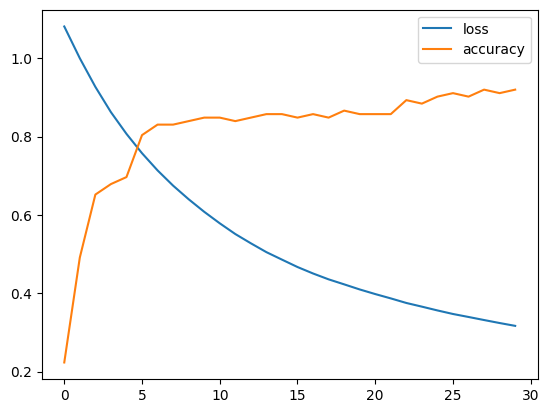

In [10]:
import matplotlib.pyplot as plt
hist_loss=history.history["loss"]
hist_acc=history.history["accuracy"]
plt.plot(np.arange(len(hist_loss)),hist_loss,label="loss")
plt.plot(np.arange(len(hist_acc)),hist_acc,label="accuracy")
plt.legend()
plt.show()

In [11]:
loss,accuracy=model.evaluate(x_test,t_test)
print("誤差:",loss,"精度:",accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9161 - loss: 0.3021 
誤差: 0.2946595251560211 精度: 0.9210526347160339


In [12]:
y_test=model.predict(x_test)
print(y_test[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[0.13125859 0.60588616 0.26285517]
 [0.98589945 0.00756023 0.00654035]
 [0.9544855  0.02777654 0.01773794]
 [0.10169052 0.48123097 0.4170784 ]
 [0.0907562  0.6340638  0.27518007]
 [0.08014607 0.76371354 0.15614045]
 [0.97056997 0.01704494 0.01238501]
 [0.60404676 0.32791692 0.0680364 ]
 [0.04618339 0.5180008  0.43581587]
 [0.9746209  0.01510088 0.0102782 ]]


In [13]:
from tensorflow.keras.models import load_model
model.save("model.keras")
load_model("model.keras")

<Sequential name=sequential, built=True>

In [14]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
iris=datasets.load_iris()
scaler=preprocessing.StandardScaler()
scaler.fit(iris.data)
x=scaler.transform(iris.data)
t=tf.keras.utils.to_categorical(iris.target)
x_train,x_test,t_train,t_test=train_test_split(x,t,train_size=0.75)

In [16]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation
model=Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dense(3))
model.add(Activation("softmax"))
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
history=model.fit(x_train,t_train,epochs=30,batch_size=8)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1707 - loss: 1.2124
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4512 - loss: 1.0602
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6094 - loss: 0.9620
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7995 - loss: 0.8558 
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6529 - loss: 0.8364 
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7855 - loss: 0.7334 
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7111 - loss: 0.7191  
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7398 - loss: 0.6830 
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6395 - loss: 0.6730 
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7590 - loss: 0.5903 
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7315 - loss: 0.5513 
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 

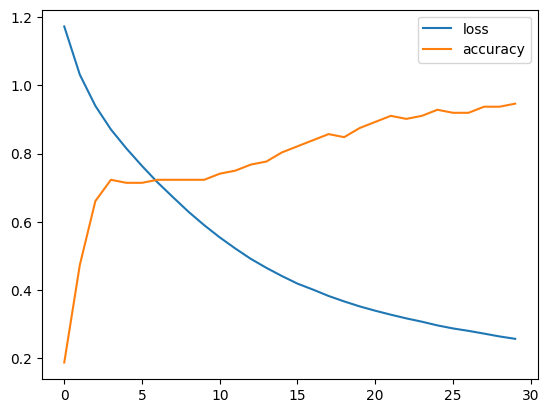

In [18]:
import matplotlib.pyplot as plt
hist_loss=history.history["loss"]
hist_acc=history.history["accuracy"]
plt.plot(np.arange(len(hist_loss)),hist_loss,label="loss")
plt.plot(np.arange(len(hist_acc)),hist_acc,label="accuracy")
plt.legend()
plt.show()

In [19]:
loss,accuracy=model.evaluate(x_test,t_test)
print("誤差:",loss,"精度:",accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8355 - loss: 0.3744
誤差: 0.39010754227638245 精度: 0.8157894611358643


In [20]:
model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[9.06036608e-03, 1.58107772e-01, 8.32831800e-01],
       [1.77985519e-01, 5.96310019e-01, 2.25704491e-01],
       [4.69251908e-02, 7.76597381e-01, 1.76477432e-01],
       [3.68667990e-02, 4.66300547e-01, 4.96832579e-01],
       [9.44832683e-01, 2.75750831e-02, 2.75922734e-02],
       [2.28394911e-05, 3.33286710e-02, 9.66648400e-01],
       [2.23217551e-02, 2.78745711e-01, 6.98932528e-01],
       [7.38752708e-02, 6.26410127e-01, 2.99714595e-01],
       [9.33760226e-01, 3.09764780e-02, 3.52632925e-02],
       [3.72576602e-02, 6.45326436e-01, 3.17415923e-01],
       [9.10497736e-03, 1.16739258e-01, 8.74155760e-01],
       [1.26176104e-01, 6.91689491e-01, 1.82134375e-01],
       [9.52551663e-01, 1.98875964e-02, 2.75607463e-02],
       [4.24760729e-02, 4.65837508e-01, 4.91686434e-01],
       [1.24529945e-02, 7.01955914e-01, 2.85591096e-01],
       [9.75585043e-01, 9.40398034e-03, 1.50109082e-02],
       [2.16347232e-01, 4.97750074e-01, 2.85902649e-01],
       [2.97781285e-02, 6.92219